# Preprocesamiento de los Datos

**se realizaron las siguientes tareas en el dataset a mano:**

1- Se limpio el dataset de los valores que tenian en null el pais

2- En el caso de company, los que eran nulos se seteo como 0 ya que eran 55000 registros en nulo

3- En el caso de agente se supuso que si era nulo, es que no usaba un agente para comprar el pasaje

4-En el caso de children nulo, simplemente se eliminaron esos casos ya que eran solo 4

# Vinculacion del drive al colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/TP 1 Datos/data/hotels_train_limpio.csv")
print(df)


      hotel;lead_time;arrival_date_year;arrival_date_month;arrival_date_week_number;arrival_date_day_of_month;stays_in_weekend_nights;stays_in_week_nights;adults;children;babies;meal;country;market_segment;distribution_channel;is_repeated_guest;previous_cancellations;previous_bookings_not_canceled;reserved_room_type;assigned_room_type;booking_changes;deposit_type;agent;company;days_in_waiting_list;customer_type;adr;required_car_parking_spaces;total_of_special_requests;reservation_status;reservation_status_date;id;is_canceled
0      City Hotel;49;2016;September;37;5;1;2;1;0.0;0;...                                                                                                                                                                                                                                                                                                                                                                                                                             

#Exploracion Inicial

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/TP 1 Datos/data/hotels_train.csv")
#df = pd.read_csv("drive/MyDrive/hotels_train.csv")
df.sample(2)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
60263,Resort Hotel,45,2016,March,12,19,2,1,2,2.0,...,314.0,NaN,0,Transient,65.65,0,0,2016-02-04,cc83d1f4-fc84-4006-920a-dbe48306913e,1
40009,City Hotel,260,2017,July,31,31,1,1,2,0.0,...,9.0,NaN,0,Transient,89.10,0,1,2017-02-08,8cffd76d-d831-44ec-bda2-3dbe429ae61e,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

#VARIABLES CUALITATIVAS

Se observan a continuacion las variables con la distribucion segun su categoria

In [ ]:
df['hotel'].value_counts(normalize = True)

City Hotel      0.680455
Resort Hotel    0.319545
Name: hotel, dtype: float64

In [ ]:
df['meal'].value_counts(normalize = True)

BB           0.772649
HB           0.120362
SC           0.089739
Undefined    0.009546
FB           0.007704
Name: meal, dtype: float64

In [ ]:
df['country'].value_counts(normalize = True)

PRT    0.453057
GBR    0.092929
FRA    0.077952
ESP    0.068242
DEU    0.053686
         ...   
HND    0.000016
FJI    0.000016
LIE    0.000016
ATA    0.000016
RWA    0.000016
Name: country, Length: 149, dtype: float64

In [ ]:
df['market_segment'].value_counts(normalize = True)

Online TA        0.472744
Offline TA/TO    0.200023
Groups           0.186471
Direct           0.092985
Corporate        0.040121
Complementary    0.005798
Aviation         0.001825
Undefined        0.000032
Name: market_segment, dtype: float64

# Variabeles cuantitativas:
- hotel: 68% de City Hotel y 31.9% de Resort hotel: 
 * 1   lead_time                       61913 non-null  int64  
 * 2   arrival_date_year               61913 non-null  int64  
 * 3   arrival_date_month              61913 non-null  object 
 * 4   arrival_date_week_number        61913 non-null  int64  
 * 5   arrival_date_day_of_month       61913 non-null  int64  
 * 6   stays_in_weekend_nights         61913 non-null  int64  
 * 7   stays_in_week_nights            61913 non-null  int64  
 * 8   adults                          61913 non-null  int64  
 * 9   children                        61909 non-null  float64
 * 10  babies                          61913 non-null  int64  
 * 11  meal                            61913 non-null  object 
 * 12  country                         61692 non-null  object 
 * 13  market_segment                  61913 non-null  object 
 * 14  distribution_channel            61913 non-null  object 
 * 15  is_repeated_guest               61913 non-null  int64  
 * 16  previous_cancellations          61913 non-null  int64  
 * 17  previous_bookings_not_canceled  61913 non-null  int64  
 * 18  reserved_room_type              61913 non-null  object 
 * 19  assigned_room_type              61913 non-null  object 
 * 20  booking_changes                 61913 non-null  int64  
 * 21  deposit_type                    61913 non-null  object 
 * 22  agent                           54023 non-null  float64
 * 23  company                         3152 non-null   float64
 * 24  days_in_waiting_list            61913 non-null  int64  
 * 25  customer_type                   61913 non-null  object 
 * 26  adr                             61913 non-null  float64
 * 27  required_car_parking_spaces     61913 non-null  int64  
 * 28  total_of_special_requests       61913 non-null  int64  
 * 29  reservation_status_date         61913 non-null  object 
 * 30  id                              61913 non-null  object 
 * 31  is_canceled                     61913 non-null  int64 

Se observan mucha cantidad de nulos en la variable "company" y algunos en la variable "agent" que analizaremos y muy pocos en las variables "children", "country"

notamos que la columna children deberia ser int y que tiene unos nulos, analizamos

In [ ]:
df[df['children'].isna()]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
27359,City Hotel,1,2015,August,32,5,0,2,3,NaN,...,NaN,NaN,0,Transient-Party,18.0,0,2,2015-08-04,6ad2b270-d3ae-464f-9d4d-0722e4c4e7bc,1
32654,City Hotel,1,2015,August,32,5,0,2,2,NaN,...,14.0,NaN,0,Transient-Party,12.0,0,1,2015-08-04,af8b8f11-dae4-494a-81f9-9aabb9d3b9ba,1
50323,City Hotel,8,2015,August,33,13,2,5,2,NaN,...,9.0,NaN,0,Transient-Party,76.5,0,1,2015-08-09,322fd306-7177-4752-88c2-891293fceba6,1
58511,City Hotel,2,2015,August,32,3,1,0,2,NaN,...,NaN,NaN,0,Transient-Party,12.0,0,1,2015-08-01,d94b4fca-243f-498c-a52f-14b52e7e5e72,1


In [ ]:
df['children'].describe()

count    61909.000000
mean         0.104896
std          0.402847
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: children, dtype: float64

Se decide rellenar los 4 registros de children con 0 ya que es cercana a la media y convertir al tipo correcto -> int

In [ ]:
df['children'] = df['children'].fillna(0).astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61913 non-null  int64  
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

In [ ]:
df.head(2)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0,...,9.0,NaN,0,Transient,115.5,0,1,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0,...,NaN,NaN,0,Transient,42.0,1,0,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0


In [ ]:
df.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
count,61913.000000,61913.000000,61913.00000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,54023.000000,3152.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000
mean,112.248187,2016.154749,27.21808,15.785812,0.924135,2.510054,1.862791,0.104889,0.007155,0.027991,0.114790,0.115420,0.195952,84.541010,188.539340,2.638977,102.383773,0.049957,0.523703,0.499750
std,110.717953,0.708389,13.52601,8.795489,0.993101,1.884926,0.589066,0.402835,0.092158,0.164948,0.993723,1.396359,0.610519,109.523772,129.457025,18.619092,47.757640,0.221023,0.775412,0.500004
min,0.000000,2015.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,23.000000,2016.000000,16.00000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,67.000000,0.000000,70.000000,0.000000,0.000000,0.000000
50%,78.000000,2016.000000,28.00000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,179.000000,0.000000,95.000000,0.000000,0.000000,0.000000
75%,172.000000,2017.000000,38.00000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,208.000000,270.000000,0.000000,126.000000,0.000000,1.000000,1.000000
max,629.000000,2017.000000,53.00000,31.000000,16.000000,40.000000,55.000000,10.000000,9.000000,1.000000,26.000000,70.000000,17.000000,535.000000,543.000000,391.000000,510.000000,8.000000,5.000000,1.000000


#Estudio de las variables

Cantidad de registros de la variable a predecir

In [ ]:
df['is_canceled'].value_counts()

0    30972
1    30941
Name: is_canceled, dtype: int64

Se observan casi la misma cantidad para recervas canceladas como las que no

---



Analizo los casos de registros que tienen valor company distinto de nulo

In [ ]:
df_with_company = df[~df['company'].isna()]
df_with_company.head(2)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
35,Resort Hotel,364,2016,October,42,12,2,6,1,0,...,NaN,223.0,0,Transient-Party,60.0,0,0,2016-10-20,68deb679-eeb2-491e-98a6-0539073b4258,0
63,Resort Hotel,0,2017,April,14,3,1,0,1,0,...,NaN,512.0,0,Transient,45.0,0,0,2017-04-04,e2680436-2a94-4532-88f1-21f11a7af3e5,0


In [ ]:
cant_canceled_for_company = df_with_company['is_canceled'].value_counts()
cant_canceled_for_company

0    2321
1     831
Name: is_canceled, dtype: int64

In [ ]:
cant_canceled_for_company[0]/ cant_canceled_for_company[1]

2.793020457280385

<Axes: title={'center': 'cantidad de reservas segun "is_canceled"'}, xlabel='is_canceled', ylabel='cantidad de reservas'>

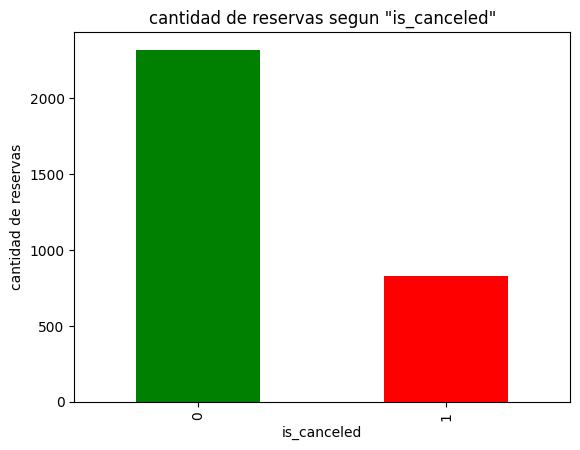

In [ ]:
from itertools import cycle, islice
my_colors = list(islice(cycle(['g', 'r']), None,2))
cant_canceled_for_company.plot(kind = 'bar', title = 'cantidad de reservas segun "is_canceled"', xlabel = 'is_canceled', ylabel = 'cantidad de reservas', color = my_colors)

Se observa que para los registros con compañia una relacion de 2.79 en favor de los no cancelados. 
Aunque los registros con company representan muy pocos valores de la muestra

# Estudiaremos las reservas canceladas y no canceladas segun su distribucion de tiempo, es decir, por año, mes y dia

In [ ]:
df_canceled = df[df['is_canceled'] == 1]
df_not_canceled = df[df['is_canceled'] == 0]

Se muestran la cantidad de reservas canceladas por año

<Axes: title={'center': 'cantidad de reservas canceladas por año'}, xlabel='año', ylabel='cantidad de reservas canceladas'>

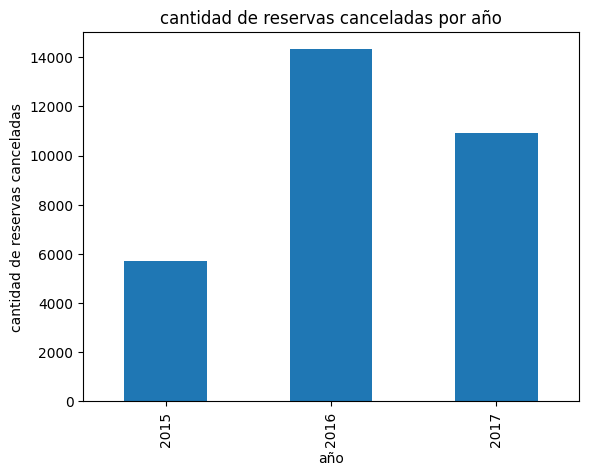

In [ ]:
df.groupby('arrival_date_year')['is_canceled'].sum().plot(kind = 'bar', title = 'cantidad de reservas canceladas por año', xlabel = 'año', ylabel='cantidad de reservas canceladas')

In [ ]:
month_list_order= ['January', 'February', 'March', 'April','May','June','July','August','September','October','November','December']

<Axes: title={'center': 'cantidad de reservas canceladas por mes'}, xlabel='mes', ylabel='cantidad de reservas canceladas'>

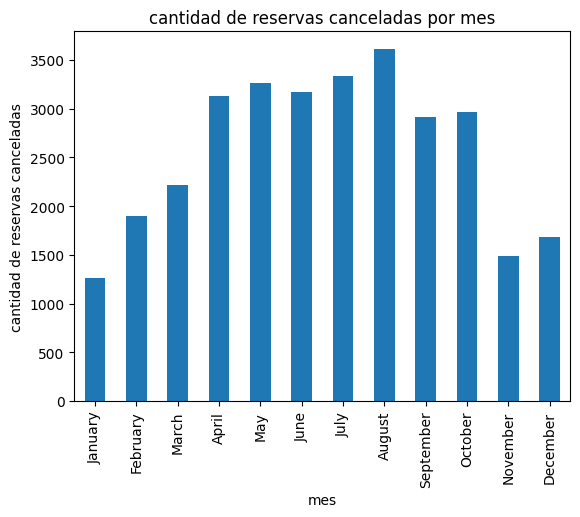

In [ ]:
df.groupby('arrival_date_month')['is_canceled'].sum().reindex(month_list_order).plot(kind = 'bar', title = 'cantidad de reservas canceladas por mes', xlabel = 'mes', ylabel='cantidad de reservas canceladas')

<ipython-input-32-48a535c61f25>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(df.groupby(['arrival_date_year','arrival_date_month'])['is_canceled'].sum().reset_index().pivot("arrival_date_month", "arrival_date_year", "is_canceled").reindex(month_list_order), cmap="crest")


<Axes: xlabel='arrival_date_year', ylabel='arrival_date_month'>

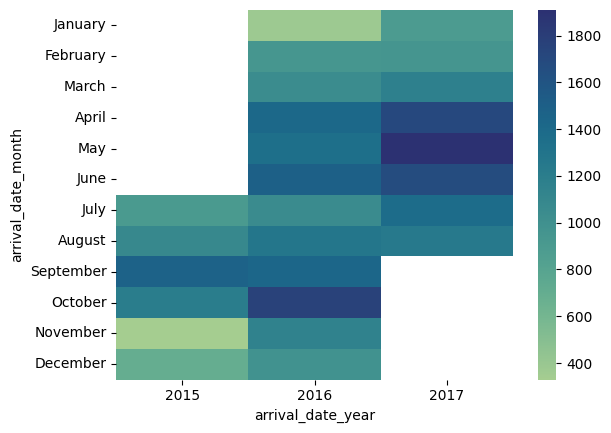

In [ ]:
sns.heatmap(df.groupby(['arrival_date_year','arrival_date_month'])['is_canceled'].sum().reset_index().pivot("arrival_date_month", "arrival_date_year", "is_canceled").reindex(month_list_order), cmap="crest")

Se observan que los datos ingresados son a partir de Julio de 2015 a agosto de 2017. Como tambien la mayor cantidad de reservas canceladas se presentan en Octubre de 2016, abril y mayo de 2017. Y las menores reservas canceladas en moviembre de 2015 y enero de 2016

In [ ]:
df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0,...,9.0,NaN,0,Transient,115.5,0,1,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0,...,NaN,NaN,0,Transient,42.0,1,0,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2,...,9.0,NaN,0,Transient,229.0,0,2,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0,...,154.0,NaN,0,Transient,75.0,0,0,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0,...,20.0,NaN,0,Transient-Party,75.0,0,1,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0


# Country

In [ ]:
# cantidad de paises
country_values = df['country'].value_counts()
country_values

PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
       ...  
HND        1
FJI        1
LIE        1
ATA        1
RWA        1
Name: country, Length: 149, dtype: int64

In [ ]:
country_values.describe()

count      149.000000
mean       414.040268
std       2402.160955
min          1.000000
25%          3.000000
50%         12.000000
75%         45.000000
max      27950.000000
Name: country, dtype: float64

In [ ]:
# paises con mas registros que la media
country_More_than_mean = country_values[country_values > country_values.mean()]
country_More_than_mean

PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
ITA     1911
IRL     1617
BRA     1152
BEL     1124
USA     1021
NLD      982
CHE      847
CN       597
AUT      581
CHN      545
SWE      481
POL      430
Name: country, dtype: int64

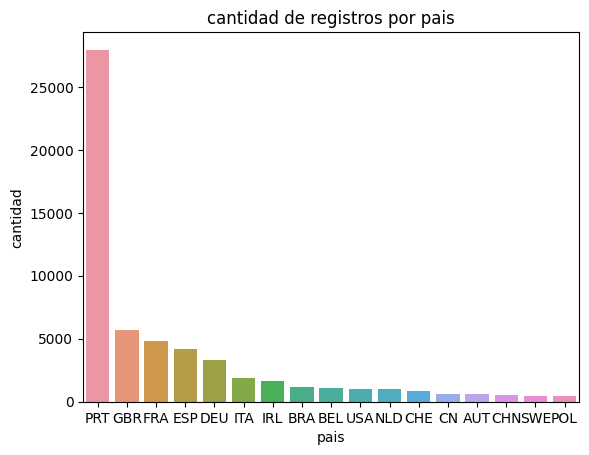

In [ ]:
sns.barplot(data = country_More_than_mean.reset_index(),x = 'index' , y = 'country')
plt.ylabel('cantidad')
plt.xlabel('pais')
plt.title('cantidad de registros por pais')
plt.show()

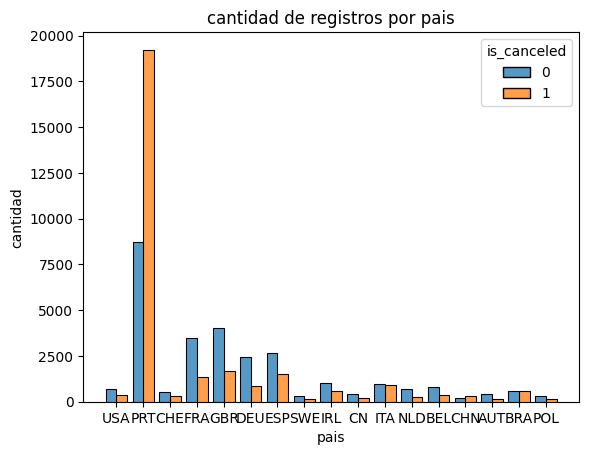

In [ ]:
#filtro por los registros con los paises mayores a la media
sns.histplot(data=df[df['country'].isin(country_More_than_mean.reset_index()['index'])], x="country", hue="is_canceled", multiple="dodge", shrink=.8)
 
plt.ylabel('cantidad')
plt.xlabel('pais')
plt.title('cantidad de registros por pais')
plt.show()

# Analisis por cantidad de personas

In [ ]:
df_cant_personas = df[['adults', 'children', 'babies', 'is_canceled']]
df_cant_personas.sample(2)

,adults,children,babies,is_canceled
22414,2,0,0,0
57103,1,0,0,0


In [ ]:
df_cant_personas[df_cant_personas['babies']>df_cant_personas['adults']]

,adults,children,babies,is_canceled
12659,1,0,9,0
41018,0,2,1,1


In [ ]:
df_cant_personas[df_cant_personas['children'] >df_cant_personas['adults']]

,adults,children,babies,is_canceled
96,0,2,0,1
212,0,2,0,1
326,0,2,0,0
481,2,3,0,0
669,2,3,0,1
...,...,...,...,...
60994,0,2,0,0
61298,0,2,0,0
61573,1,2,0,1
61604,1,2,0,0


In [ ]:
df_cant_personas[df_cant_personas['babies'] + df_cant_personas['children'] >df_cant_personas['adults']]

,adults,children,babies,is_canceled
96,0,2,0,1
212,0,2,0,1
326,0,2,0,0
481,2,3,0,0
669,2,3,0,1
...,...,...,...,...
60998,2,2,1,0
61298,0,2,0,0
61573,1,2,0,1
61604,1,2,0,0


In [ ]:
df_cant_personas['children'].value_counts()

0     57461
1      2457
2      1955
3        39
10        1
Name: children, dtype: int64

In [ ]:
df[df['children']>9]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
49181,Resort Hotel,55,2015,July,29,12,4,10,2,10,...,8.0,NaN,0,Contract,133.16,0,1,2015-07-12,44093355-c1c8-41eb-bcb4-40dc494fa1a9,1


In [ ]:
df_cant_personas

,adults,children,babies,is_canceled
0,1,0,0,1
1,2,0,0,0
2,2,2,0,0
3,2,0,0,1
4,2,0,0,0
...,...,...,...,...
61908,2,0,0,1
61909,1,0,0,0
61910,1,0,0,0
61911,2,0,0,1


# Análisis de Correlacion entre Variables

para ello se buscara hallar la covarianza del dataset con cada variable
y se usara el siguiente rango de correlacion
Se emplean como medida de la fuerza de asociación entre dos variables (tamaño del efecto):
* 0.0: asociación nula.
* 0.1: asociación pequeña.
* 0.3: asociación mediana.
* 0.5: asociación moderada.
* 0.7: asociación alta.
* 0.9: asociación muy alta.

respecto del signo:
Con este estadístico medimos el signo de la relación lineal entre X
 e Y:

* Si SXY=0: Entonces no existe relación lineal entre X  e Y
* Si SXY>0: Entonces existe una relación lineal directa o positiva entre X e Y. Esto es, a mayores valores de X, en promedio tenemos mayores valores de Y
 y viceversa.
* Si SXY<0: entonces existe una relación lineal inversa o negativa entre X
 e Y. Esto es, a mayores valores de X, en promedio tenemos menores valores de Y
 y viceversa.


In [ ]:
df.cov(numeric_only= True)

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
lead_time,12258.465118,1.818502,201.862627,-6.755375,6.538163,29.240236,7.235679,-2.053442,-0.233379,-1.972980,10.411942,-10.528775,-1.334055,-962.055439,1655.706735,343.075082,-499.994682,-2.784139,-10.539204,16.265487
arrival_date_year,1.818502,0.501815,-5.179294,0.014490,0.019041,0.054483,0.011090,0.016960,-0.000897,-0.000536,-0.100123,0.026815,0.011800,6.317823,22.581197,-0.771887,7.355174,-0.001819,0.059268,0.007057
arrival_date_week_number,201.862627,-5.179294,182.952957,6.868022,0.189758,0.311042,0.206254,0.034594,0.020212,-0.049165,0.611967,-0.451341,0.099807,-63.737370,-81.997347,4.867659,48.723868,0.004256,0.307129,0.056522
arrival_date_day_of_month,-6.755375,0.014490,6.868022,77.360619,-0.135548,-0.438496,0.012687,0.049634,0.002082,-0.007588,-0.301683,-0.024881,0.051129,2.509370,53.962390,4.545072,14.153569,0.000573,0.052814,-0.032414
stays_in_weekend_nights,6.538163,0.019041,0.189758,-0.135548,0.986249,0.914826,0.048787,0.020798,0.002013,-0.013172,-0.010964,-0.052637,0.026528,16.571829,6.628608,-1.063376,2.899560,-0.003123,0.055560,0.000635
stays_in_week_nights,29.240236,0.054483,0.311042,-0.438496,0.914826,3.552946,0.097702,0.044252,0.003716,-0.027473,-0.025132,-0.118941,0.080663,40.993838,44.734971,-0.145275,7.463522,-0.009022,0.107217,0.026803
adults,7.235679,0.011090,0.206254,0.012687,0.048787,0.097702,0.346999,0.006930,0.000804,-0.012554,-0.001871,-0.079702,-0.016320,-1.643773,11.496075,-0.103322,6.232389,0.001379,0.049148,0.017725
children,-2.053442,0.016960,0.034594,0.049634,0.020798,0.044252,0.006930,0.162276,0.001075,-0.001983,-0.010926,-0.011073,0.014480,2.563255,0.726397,-0.266096,6.742633,0.004031,0.024988,0.001254
babies,-0.233379,-0.000897,0.020212,0.002082,0.002013,0.003716,0.000804,0.001075,0.008493,-0.000136,-0.000708,-0.000745,0.004962,0.367992,0.199641,-0.018640,0.148478,0.000741,0.006671,-0.001476
is_repeated_guest,-1.972980,-0.000536,-0.049165,-0.007588,-0.013172,-0.027473,-0.012554,-0.001983,-0.000136,0.027208,0.012454,0.093519,0.000847,0.237319,-12.651371,-0.067036,-1.041904,0.002688,0.002042,-0.007463


#Analisis de cada variable:
**Lead_Time:**
tiene una alta correlacion con las demas variables, salvo con la variable Babies quela correlacion es pequeña.

**Arrival_Date_Year:**
**tiene correlacion muy alta:
  * positiva: lead time, arrival_date_week_number (en este caso existe una relacion lineal inversa), agent, company y adr.

** Asociación casi nula:
  * positiva con variable arrival_date_day_of_month, stays_in_weekend_nights, is_canceled, total_of_special_requests, booking_changes.
  * negativa con variables: required_car_parking_spaces,previous_bookings_not_canceled.

** asociación pequeña (cov<0,1):
* negativa: con babies,is_repeated_guest, required_car_parking_spaces
*  positiva: con variable arrival_date_year,arrival_date_day_of_month, 
stays_in_weekend_nights, adult, children,previous_bookings_not_canceled
negativa: previous_cancellations
  
** asociación mediana(0.3<cov<=0,5): 
  *no hay ni positiva ni negativa
  
** asociación moderada(0.5<cov<0,7):
* positiva: arrival_date_year.
  
** asociación alta(0.7<cov<0,9):
  * negstiva con days_in_waiting_list.


**arrival_date_week_number:**
* asociacion casi nula (0<cov<0,1)
  * positiva con variable: children, babies, booking_changes, required_car_parking_spaces, is_canceled.
  * negativa con variables: is_repeated_guest.
* asociacion pequeña (0,1<cov<0,3):
  * positiva con variables: stays_in_weekend_nights, adults.
  * negativa con variables: ninguna.
* asociacion mediana (0,3<cov<0,5):
  * positiva: stays_in_week_nights, total_of_special_requests.
  * negativa: previous_bookings_not_canceled.
* asociacion moderada (0,5<cov<0,7):
  * positiva: previous_cancellations.
  * negativa: ninguna.
* asociacion alta (0,7<cov<0,9):
  * positiva: ninguna.
  * negativa: ninguna.
* asociacion muy alta (cov<0,9):
  * positiva: lead_time,arrival_date_week_number,arrival_date_day_of_month,days_in_waiting_list, adr.
  * negativa: arrival_date_year, agent, company.

**arrival_date_day_of_month**
* asociacion casi nula (0<cov<0,1)
  * positiva: arrival_date_year, adults, children, babies, booking_changes, required_car_parking_spaces, total_of_special_requests
  * negativa: is_repeated_guest, is_canceled.
* asociacion pequeña (0,1<cov<0,3):
  * positiva: ninguna.
  * negativa: stays_in_weekend_nights, previous_bookings_not_canceled.
* asociacion mediana (0,3<cov<0,5):
  * positiva: ninguna.
  * negativa: stays_in_week_nights, previous_cancellations.
* asociacion moderada (0,5<cov<0,7):
  * positiva: ninguna.
  * negativa: ninguna.
* asociacion alta (0,7<cov<0,9):
  * positiva: ninguna.
  * negativa: ninguna.
* asociacion muy alta (cov<0,9):
  * positiva: arrival_date_week_number, arrival_date_days_of_mont, agent, company, days_in_waiting_list, adr
  * negativa:lead_time

**stays_in_weekend_nights:**
* asociacion casi nula (0<cov<0,1)
  * positiva: arrival_date_year, adults, children, babies, booking_changes, total_of_special_requests, is_canceled.
  * negativa: is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, required_car_parking_spaces.
* asociacion pequeña (0,1<cov<0,3):
  * positiva con variables: arrival_date_week_number.
  * negativa con variables: arrival_date_day_of_month.
* asociacion mediana (0,3<cov<0,5):
  * positiva: stays_in_week_nights, total_of_special_requests.
  * negativa: previous_bookings_not_canceled.
* asociacion moderada (0,5<cov<0,7):
  * positiva: previous_cancellations.
  * negativa: ninguna.
* asociacion alta (0,7<cov<0,9):
  * positiva: ninguna.
  * negativa: ninguna.
* asociacion muy alta (cov<0,9):
  * positiva: lead_time, stays_in_weekend_nights, stays_in_week_nights, agent, company,adr.
  * negativa: days_in_waiting_list